In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as s
from numpy.polynomial.polynomial import Polynomial
import seaborn as sns
import numpy.polynomial.polynomial as poly
import warnings

In [2]:
file_name = "vizier_votable.csv"

df = pd.read_csv(file_name, skiprows=3, delimiter=";", usecols=[0, 1, 2, 3], names=["lambda", "EW", "relDepth", "ConvBS"])
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df = df.astype(float)

lambda_array = df["lambda"].to_numpy()
EW_array = df["EW"].to_numpy()
relDepth_array = df["relDepth"].to_numpy()
ConvBS_array = df["ConvBS"].to_numpy()

df

,lambda,EW,relDepth,ConvBS
0,4051819.0,NaN,0.60,-548.7
1,4053050.0,79.0,0.69,-44.4
2,4053440.0,60.0,0.62,-625.3
3,4055322.0,50.0,0.52,-472.2
4,4056181.0,80.0,0.74,-597.1
...,...,...,...,...
1246,7445072.0,38.0,0.26,-478.5
1247,7447802.0,178.0,0.59,-223.2
1248,7449445.0,38.0,0.23,-413.0
1249,7456050.0,11.0,0.09,-416.1


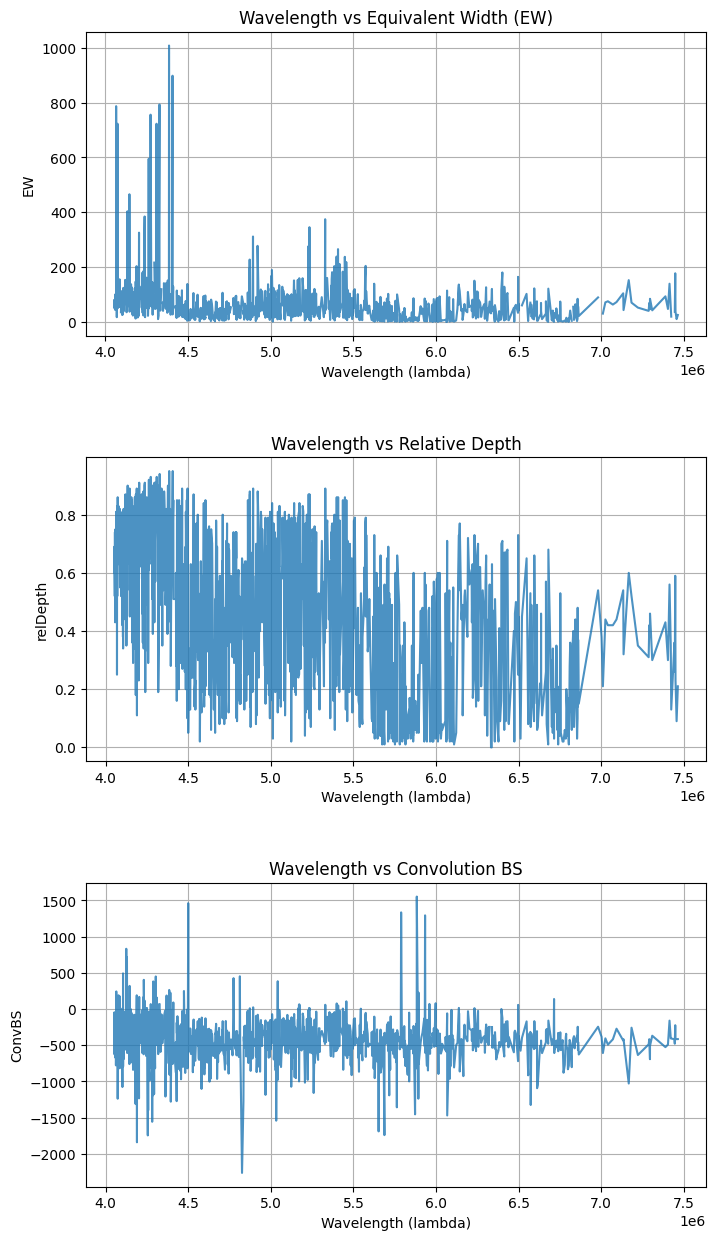

In [3]:
fig, axes = plt.subplots(3, 1, figsize=(8, 15))
plt.subplots_adjust(hspace=0.4)

columns = ["EW", "relDepth", "ConvBS"]
titles = ["Equivalent Width (EW)", "Relative Depth", "Convolution BS"]

for i, col in enumerate(columns):
    axes[i].plot(df["lambda"], df[col], linestyle='-', marker='', alpha=0.8)
    axes[i].set_xlabel("Wavelength (lambda)")
    axes[i].set_ylabel(col)
    axes[i].set_title(f"Wavelength vs {titles[i]}")
    axes[i].grid(True)

plt.show()

In [4]:
file_name = "vizier_votable_VIS.tsv"

df2 = pd.read_csv(file_name, delimiter=";", names=["Wave", "nFlux", "rFlux"])

df2 = df2.astype(float)

#df2 = df2.iloc[::-1]

wave_array = df2["Wave"].to_numpy()
nflux_array = df2["nFlux"].to_numpy()
rflux_array = df2["rFlux"].to_numpy()

df2

,Wave,nFlux,rFlux
0,24366.984795,0.752675,0.003375
1,24366.988562,0.766579,0.003385
2,24366.992329,0.759569,0.003398
3,24366.996095,0.747408,0.003402
4,24366.999862,0.756657,0.003402
...,...,...,...
3007454,24366.965963,0.781094,0.003321
3007455,24366.969729,0.781869,0.003357
3007456,24366.973496,0.777464,0.003366
3007457,24366.977262,0.760686,0.003361


In [5]:
wavelenght_array = (10**(7))/wave_array
df2["Wave"] = wavelenght_array

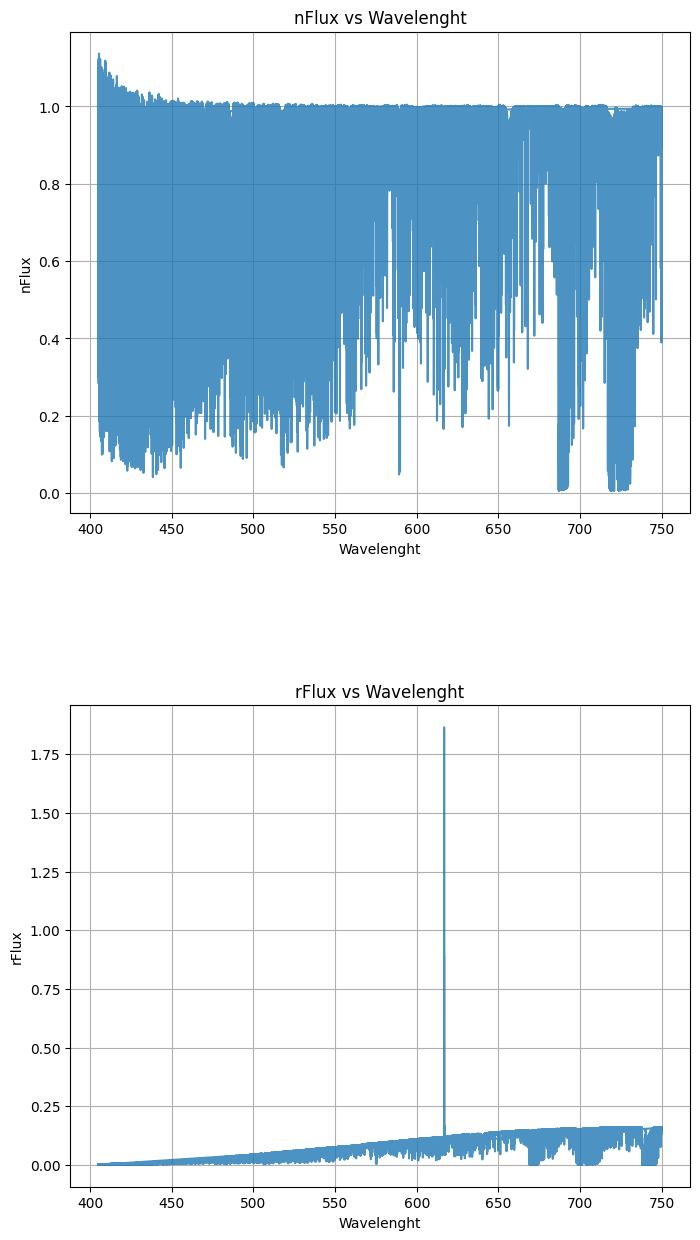

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(8, 15))
plt.subplots_adjust(hspace=0.4)

columns2 = ["nFlux", "rFlux"]
titles2 = ["nFlux", "rFlux"]

for i, col in enumerate(columns2):
    axes[i].plot(df2["Wave"], df2[col], linestyle='-', marker='', alpha=0.8)
    axes[i].set_xlabel("Wavelenght")
    axes[i].set_ylabel(col)
    axes[i].set_title(f"{titles2[i]} vs Wavelenght")
    axes[i].grid(True) 

plt.show()

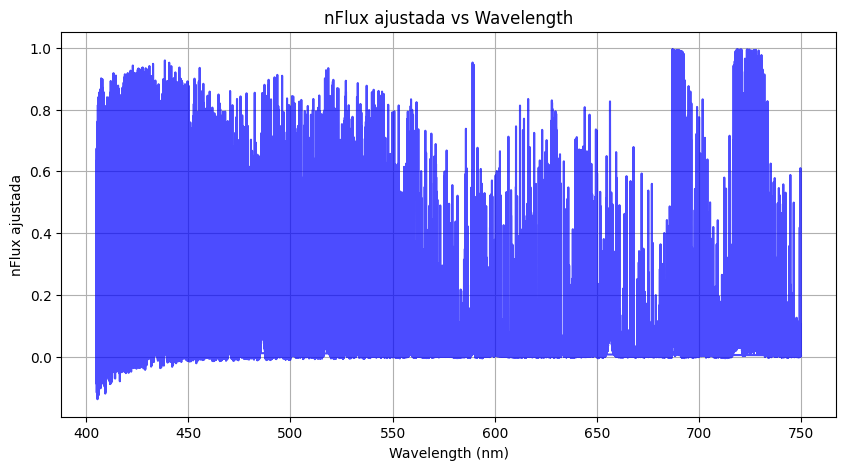

In [7]:
df2["nFlux_ajustada"] = 1 - df2["nFlux"]

plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"], df2["nFlux_ajustada"], color='blue', alpha=0.7)

plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux ajustada")
plt.title("nFlux ajustada vs Wavelength")
plt.grid(True)

plt.show()

In [10]:
arriba = np.abs(df2["Wave"] - 405.17).argmin()
abajo = np.abs(df2["Wave"] - 405.195).argmin()
print(abajo, arriba)

82965 83369


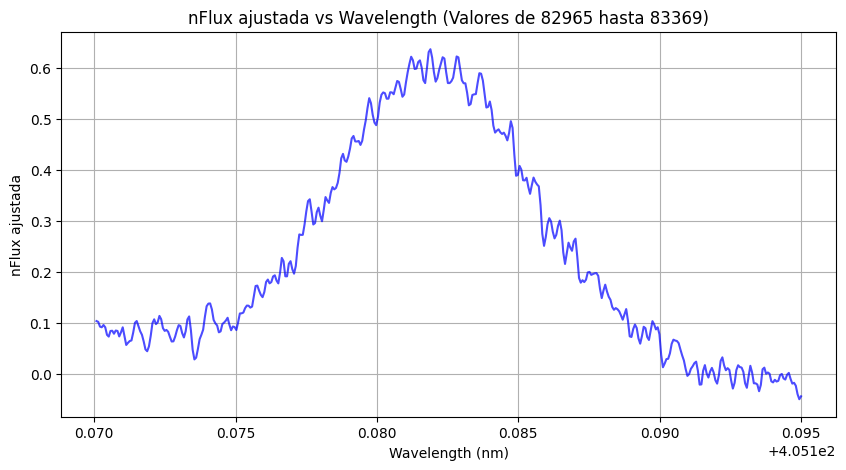

In [11]:
df2["nFlux_ajustada"] = 1 - df2["nFlux"]

plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"][abajo:arriba], df2["nFlux_ajustada"][abajo:arriba], color='blue', alpha=0.7)

plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux ajustada")
plt.title(f"nFlux ajustada vs Wavelength (Valores de {abajo} hasta {arriba})")
plt.grid(True)

plt.show()

In [12]:
#Cuadrar lineas de absorcion con valores en el espectro completo
df["lambda"] = lambda_array / 10000

lambda_filtradas = df["lambda"][df["lambda"] >= df2["Wave"].min()]

def encontrar_mas_cercano(valor, array):
    idx = (np.abs(array - valor)).argmin()
    return array[idx]

valores_mas_cercanos = [encontrar_mas_cercano(i, df2["Wave"].values) for i in lambda_filtradas]

flux_mas_cercanos = [df2.loc[df2["Wave"] == i, "nFlux_ajustada"].values[0] for i in valores_mas_cercanos]

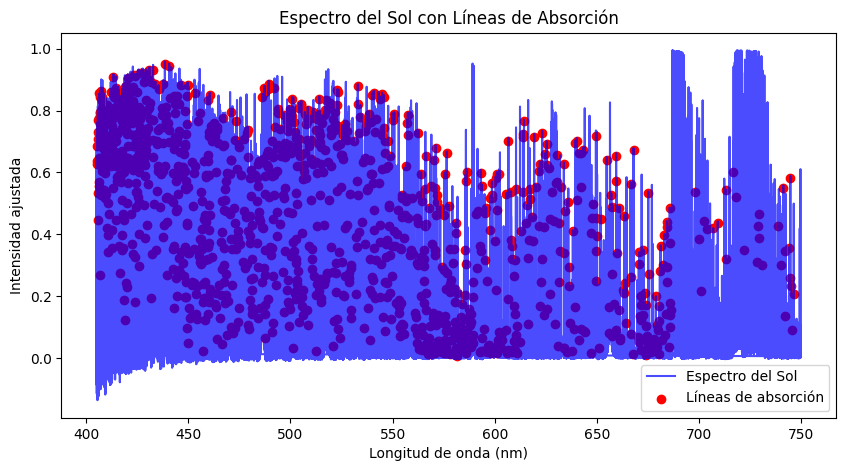

In [13]:
#Graficar
plt.figure(figsize=(10,5))
plt.plot(df2["Wave"], df2["nFlux_ajustada"], label="Espectro del Sol", color="blue", alpha = 0.7)
plt.scatter(valores_mas_cercanos, flux_mas_cercanos, color='red', label="Líneas de absorción")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Intensidad ajustada")
plt.legend()
plt.title("Espectro del Sol con Líneas de Absorción")
plt.show()

In [14]:
print(f"Cantidad de lineas encontradas: {len(valores_mas_cercanos)}")

Cantidad de lineas encontradas: 1251


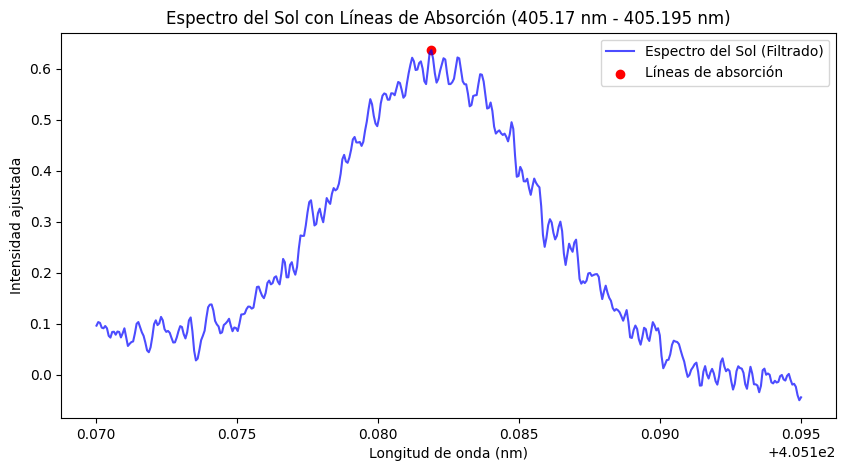

In [15]:
maximo = max(df2["Wave"])
minimo = min(df2["Wave"])
lambda_min = 405.17 #600 #405.15
lambda_max = 405.195 #601.1 #405.2

df2_filtrado = df2[(df2["Wave"] >= lambda_min) & (df2["Wave"] <= lambda_max)]

valores_mas_cercanos_filtrados = [val for val in valores_mas_cercanos if lambda_min <= val <= lambda_max]
flux_mas_cercanos_filtrados = [df2.loc[df2["Wave"] == val, "nFlux_ajustada"].values[0] for val in valores_mas_cercanos_filtrados]

plt.figure(figsize=(10,5))
plt.plot(df2_filtrado["Wave"], df2_filtrado["nFlux_ajustada"], label="Espectro del Sol (Filtrado)", color="blue", alpha=0.7)
plt.scatter(valores_mas_cercanos_filtrados, flux_mas_cercanos_filtrados, color='red', label="Líneas de absorción")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Intensidad ajustada")
plt.legend()
plt.title(f"Espectro del Sol con Líneas de Absorción ({lambda_min} nm - {lambda_max} nm)")
plt.show()


In [21]:
limit_miliarmstrong = 50
limit_nm = limit_miliarmstrong * 10**(-4)

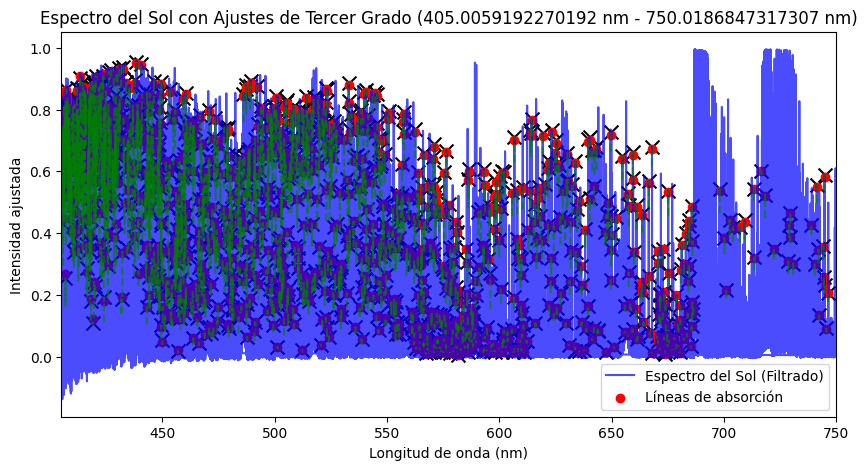

In [15]:
puntos_a_lados = 60

plt.figure(figsize=(10, 5))
plt.plot(df2_filtrado["Wave"], df2_filtrado["nFlux_ajustada"], label="Espectro del Sol (Filtrado)", color="blue", alpha=0.7)

# Ajuste
c = 0
lambda_natural = []
flux_lista = []

for centro in valores_mas_cercanos_filtrados:
    idx_centro = df2.index[df2["Wave"] == centro][0]
    idx_derecha = (df2["Wave"] - (centro - limit_nm)).abs().idxmin()
    idx_izquierda = (df2["Wave"] - (centro + limit_nm)).abs().idxmin()
    #print(idx_izquierda, idx_derecha)

    #Seleccionar puntos
    idx_min = idx_izquierda
    idx_max = idx_derecha

    '''idx_min = max(0, idx_centro - puntos_a_lados)
    idx_max = min(len(df2) - 1, idx_centro + puntos_a_lados)'''

    wave_segment = df2["Wave"].iloc[idx_min:idx_max].values
    #print(wave_segment)
    flux_segment = df2["nFlux_ajustada"].iloc[idx_min:idx_max].values

    #Ajuste
    coefs = poly.polyfit(wave_segment, flux_segment, 2)

    #Derivar
    d_coefs = poly.polyder(coefs)
    critical_points = poly.polyroots(d_coefs)  #Raices de la deriv.
    
    if lambda_min == minimo and lambda_max == maximo:
        valid_critical_points = critical_points
    else:
        valid_critical_points = [x for x in critical_points if wave_segment.min() <= x <= wave_segment.max()]
    
    '''valid_critical_points = [x for x in critical_points if wave_segment.min() <= x <= wave_segment.max()]'''

    #valid_critical_points = [x.real for x in critical_points if x.imag == 0 and wave_segment.min() <= x.real <= wave_segment.max()]

    #print(critical_points)

    #raise KeyboardInterrupt

    if valid_critical_points:
        flux_criticos = poly.polyval(valid_critical_points, coefs)

        #Encontrar maximo
        max_idx = np.argmax(flux_criticos)
        max_wave = valid_critical_points[max_idx]
        max_flux = flux_criticos[max_idx]

        lambda_natural.append(max_wave)
        flux_lista.append(max_flux)

        plt.scatter(max_wave, max_flux, color="black", marker="x", s=100)

    #Evaluar el ajuste en los puntos de la curva
    wave_fit = np.linspace(wave_segment.min(), wave_segment.max(), 100)
    flux_fit = poly.polyval(wave_fit, coefs)
    plt.plot(wave_fit, flux_fit, linestyle="--", color="green", alpha=0.7)
    warnings.filterwarnings("ignore", category=UserWarning, module="numpy.polynomial.polynomial")

plt.scatter(valores_mas_cercanos_filtrados, 
            [df2.loc[df2["Wave"] == val, "nFlux_ajustada"].values[0] for val in valores_mas_cercanos_filtrados], 
            color='red', label="Líneas de absorción")

plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Intensidad ajustada")
plt.legend()
plt.title(f"Espectro del Sol con Ajustes de Tercer Grado ({lambda_min} nm - {lambda_max} nm)")
plt.xlim(lambda_min, lambda_max)
plt.show()

In [33]:
lambda_obs = valores_mas_cercanos_filtrados
lambda_natural_original = lambda_array * 10**(-4)
C = 299792458 #en metros por segundo

print(len(lambda_natural), len(lambda_obs))
'''print(lambda_natural)
print(lambda_obs)
print(flux_lista)'''

def velocidad(ln, lo):
    return round((((lo/ln) - 1) * C) - 633)

lista_velocidades = []

for i in range(len(lambda_natural)):
    lista_velocidades.append(velocidad(lambda_natural[i], lambda_obs[i]))

while len(lambda_obs) != len(lambda_natural):
    lambda_obs.pop(0)

1251 1251


In [34]:
nombres = ["Lambda Natural", "lambda Observado", "Flujo", "Velocida Calulada"]

def save_lists_to_csv(ln, lo, v, flujo, nombres, filename="tabla_resultados.xlsx"):

    data = {nombres[0]: ln, nombres[1]: lo, nombres[2]: flujo, nombres[3]: v}
    
    df = pd.DataFrame(data)

    df.to_excel(filename, index=False, engine="openpyxl")

    print(f"CSV file '{filename}' saved successfully!")

save_lists_to_csv(lambda_natural, lambda_obs, lista_velocidades, flux_lista, nombres, "tabla_resultados.xlsx")

CSV file 'tabla_resultados.xlsx' saved successfully!


In [ ]:
#Tabla Velocidad vs Flujo
#Tabla con Valores Originales

In [72]:
limit_miliarmstrong = 22
limit_nm = limit_miliarmstrong * 10**(-4)

c:\Users\PEPE\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\polynomial\polynomial.py:1467: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


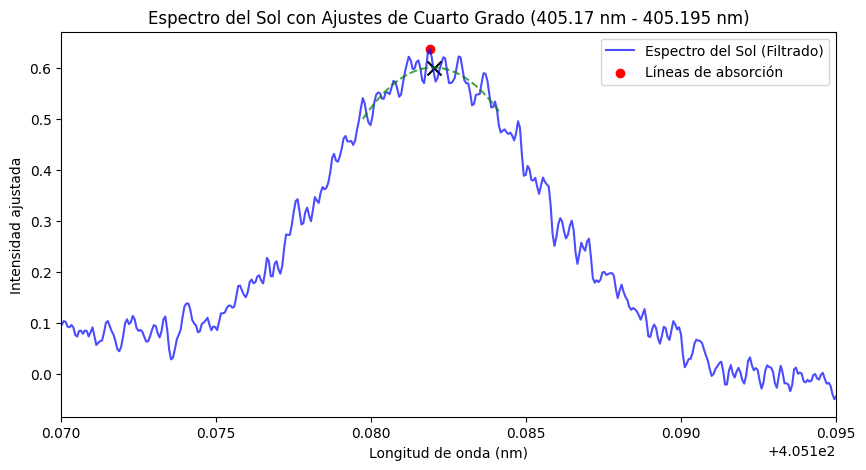

In [77]:
puntos_a_lados = 60

plt.figure(figsize=(10, 5))
plt.plot(df2_filtrado["Wave"], df2_filtrado["nFlux_ajustada"], label="Espectro del Sol (Filtrado)", color="blue", alpha=0.7)

# Ajuste
c = 0
lambda_obs = []
flux_lista = []

for centro in valores_mas_cercanos_filtrados:
    idx_centro = df2.index[df2["Wave"] == centro][0]
    idx_derecha = (df2["Wave"] - (centro - limit_nm)).abs().idxmin()
    idx_izquierda = (df2["Wave"] - (centro + limit_nm)).abs().idxmin()
    #print(idx_izquierda, idx_derecha)

    #Seleccionar puntos
    idx_min = idx_izquierda
    idx_max = idx_derecha

    '''idx_min = max(0, idx_centro - puntos_a_lados)
    idx_max = min(len(df2) - 1, idx_centro + puntos_a_lados)'''

    wave_segment = df2["Wave"].iloc[idx_min:idx_max].values
    #print(wave_segment)
    flux_segment = df2["nFlux_ajustada"].iloc[idx_min:idx_max].values

    #Ajuste
    coefs = poly.polyfit(wave_segment, flux_segment, 4)

    #Derivar
    d_coefs = poly.polyder(coefs)
    critical_points = poly.polyroots(d_coefs)  #Raices de la deriv.
    
    if lambda_min == minimo and lambda_max == maximo:
        valid_critical_points = critical_points
    else:
        valid_critical_points = [x for x in critical_points if wave_segment.min() <= x <= wave_segment.max()]
    
    '''valid_critical_points = [x for x in critical_points if wave_segment.min() <= x <= wave_segment.max()]'''

    valid_critical_points = [x.real for x in critical_points if x.imag == 0 and wave_segment.min() <= x.real <= wave_segment.max()]

    #print(critical_points)

    #raise KeyboardInterrupt

    if valid_critical_points:
        flux_criticos = poly.polyval(valid_critical_points, coefs)

        #Encontrar maximo
        max_idx = np.argmax(flux_criticos)
        max_wave = valid_critical_points[max_idx]
        max_flux = flux_criticos[max_idx]

        lambda_obs.append(max_wave)
        flux_lista.append(max_flux)

        plt.scatter(max_wave, max_flux, color="black", marker="x", s=100)

    #Evaluar el ajuste en los puntos de la curva
    wave_fit = np.linspace(wave_segment.min(), wave_segment.max(), 100)
    flux_fit = poly.polyval(wave_fit, coefs)
    plt.plot(wave_fit, flux_fit, linestyle="--", color="green", alpha=0.7)
    warnings.filterwarnings("ignore", category=UserWarning, module="numpy.polynomial.polynomial")

plt.scatter(valores_mas_cercanos_filtrados, 
            [df2.loc[df2["Wave"] == val, "nFlux_ajustada"].values[0] for val in valores_mas_cercanos_filtrados], 
            color='red', label="Líneas de absorción")

plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Intensidad ajustada")
plt.legend()
plt.title(f"Espectro del Sol con Ajustes de Cuarto Grado ({lambda_min} nm - {lambda_max} nm)")
plt.xlim(lambda_min, lambda_max)
plt.show()

In [74]:
lambda_natural = valores_mas_cercanos_filtrados
lambda_natural_original = lambda_array * 10**(-4)
lambda_natural = lambda_natural_original[0:len(lambda_obs)]  #Comment this out to toggle code calculated or given natural lambda
C = 299792458 #en metros por segundo

print(len(lambda_natural), len(lambda_obs))
'''print(lambda_natural)
print(lambda_obs)
print(flux_lista)'''

def velocidad(ln, lo):
    return round((((lo/ln) - 1) * C) - 633)

lista_velocidades = []

for i in range(len(lambda_natural)):
    lista_velocidades.append(velocidad(lambda_natural[i], lambda_obs[i]))

while len(lambda_obs) != len(lambda_natural):
    lambda_obs.pop(0)

1 1


In [75]:
nombres = ["Lambda Natural", "lambda Observado", "Flujo", "Velocida Calulada"]

def save_lists_to_csv(ln, lo, v, flujo, nombres, filename="tabla_resultados.xlsx"):

    data = {nombres[0]: ln, nombres[1]: lo, nombres[2]: flujo, nombres[3]: v}
    
    df = pd.DataFrame(data)

    df.to_excel(filename, index=False, engine="openpyxl")

    print(f"CSV file '{filename}' saved successfully!")

save_lists_to_csv(lambda_natural, lambda_obs, lista_velocidades, flux_lista, nombres, "tabla_resultados.xlsx")

CSV file 'tabla_resultados.xlsx' saved successfully!


In [15]:
lambda_natural = max_wave.real
flux_real = max_flux.real
lambda_obs = valores_mas_cercanos_filtrados[0]
C = 299792458 #en metros por segundo

print(lambda_obs, lambda_natural, flux_real)

print(f'{round((((lambda_natural/lambda_obs) - 1) * C) - 633 )} metros/segundo')
#El valor que se resta de 633 es por el corrimiento al rojo gravitcional

600.4674897031911 601.0228703785747 0.600571870803833
276649 metros/segundo


**Codigo viejo obsoleto**

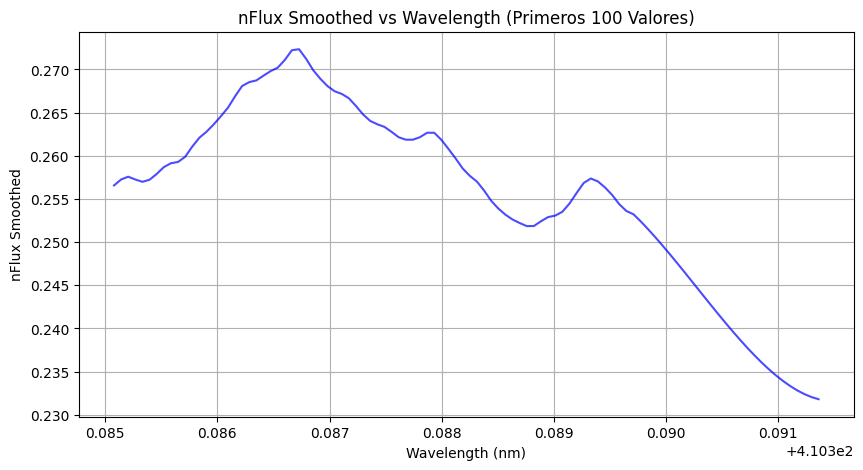

In [12]:
df2["flux_smooth"] = s.savgol_filter(df2["nFlux_ajustada"], window_length=51, polyorder=3)

plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"][:100], df2["flux_smooth"][:100], color='blue', alpha=0.7)

plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux Smoothed")
plt.title("nFlux Smoothed vs Wavelength (Primeros 100 Valores)")
plt.grid(True)

plt.show()

C:\Users\esteb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


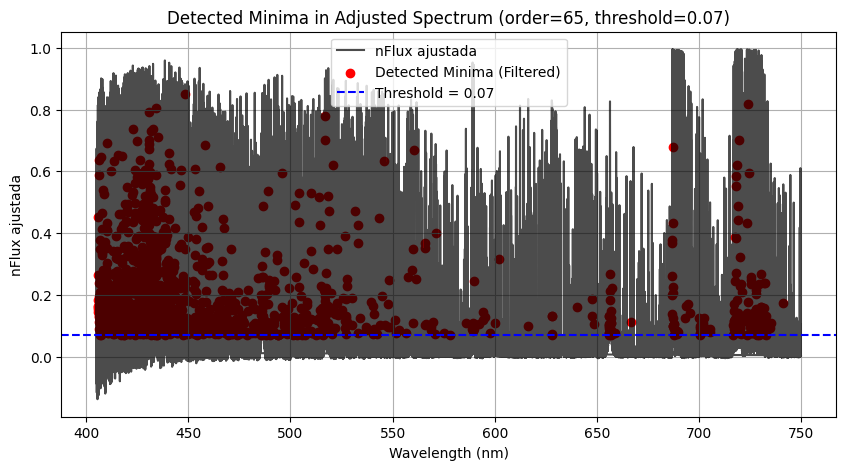

In [38]:
df2["nFlux_ajustada"] = 1 - df2["nFlux"]

# Parámetros de detección
order_value = 65  # Ajusta este valor para encontrar mínimos más prominentes
nFlux_threshold = 0.07  # No detectar mínimos con valores por debajo de este umbral

# Detectar mínimos relativos en `nFlux_ajustada`
min_indices = s.argrelmin(df2["nFlux_ajustada"].values, order=order_value)[0]

# Filtrar los mínimos que están por debajo del umbral
filtered_min_indices = [idx for idx in min_indices if df2["nFlux_ajustada"].iloc[idx] > nFlux_threshold]

# Extraer las longitudes de onda correspondientes a los mínimos filtrados
lambda_minimos = df2["Wave"].iloc[filtered_min_indices]
nFlux_minimos = df2["nFlux_ajustada"].iloc[filtered_min_indices]

# Graficar el espectro con los mínimos detectados después del filtro
plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"], df2["nFlux_ajustada"], label="nFlux ajustada", color='black', alpha=0.7)
plt.scatter(lambda_minimos, nFlux_minimos, color='red', label="Detected Minima (Filtered)", marker='o')
plt.axhline(nFlux_threshold, color='blue', linestyle='--', label=f"Threshold = {nFlux_threshold}")
plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux ajustada")
plt.title(f"Detected Minima in Adjusted Spectrum (order={order_value}, threshold={nFlux_threshold})")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
print(lambda_minimos)

8          410.390851
183        410.379750
428        410.364210
738        410.344548
1019       410.326727
              ...    
3006293    410.465339
3006467    410.454297
3006815    410.432216
3006881    410.428028
3007426    410.393452
Name: Wave, Length: 1382, dtype: float64


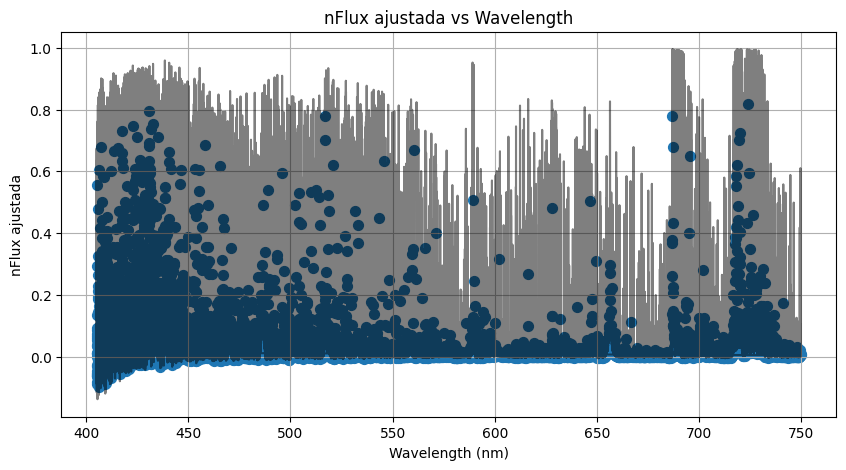

In [151]:
min_indices, properties = s.find_peaks(-df2["flux_smooth"], prominence=0.02, distance=100)

plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"], df2["nFlux_ajustada"], color='black', alpha=0.5)
plt.scatter(df2.iloc[min_indices]["Wave"], df2.iloc[min_indices]["nFlux_ajustada"], s = 50)
plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux ajustada")
plt.title("nFlux ajustada vs Wavelength")
plt.grid(True)


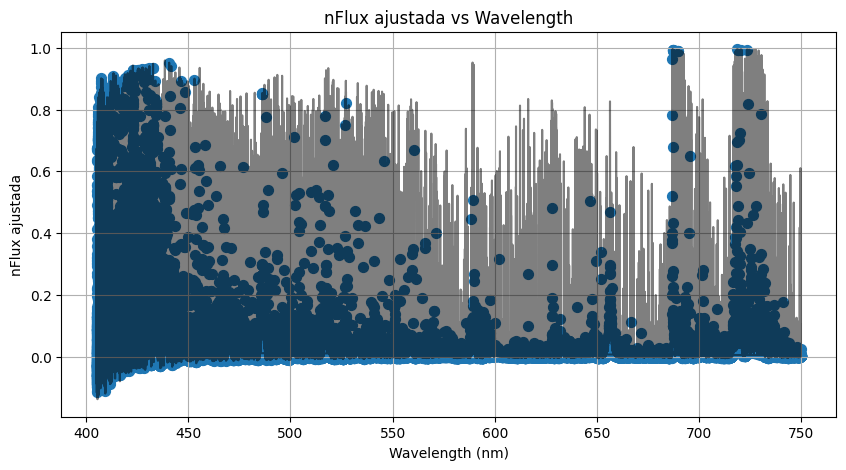

In [152]:
dy = np.gradient(df2["flux_smooth"])
d2y = np.gradient(dy)
# Find zero-crossings of first derivative where it goes from negative to positive
zero_crossings = np.where((dy[:-1] < 0) & (dy[1:] > 0))[0] + 1
# Filter those points by requiring concave-up curvature (second derivative > 0)
min_indices = [i for i in zero_crossings if d2y[i] > 0]

plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"], df2["nFlux_ajustada"], color='black', alpha=0.5)
plt.scatter(df2.iloc[min_indices]["Wave"], df2.iloc[min_indices]["nFlux_ajustada"], s = 50)
plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux ajustada")
plt.title("nFlux ajustada vs Wavelength")
plt.grid(True)


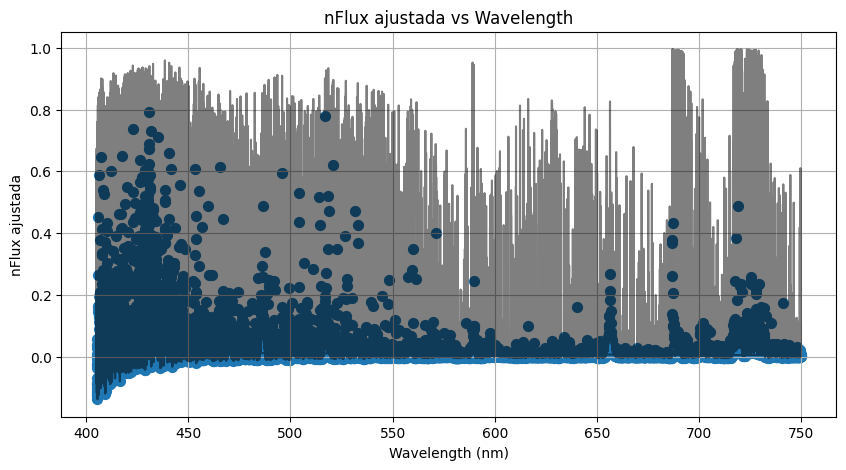

In [ ]:
min_filter = s.argrelmin(df2["nFlux_ajustada"].values, order=100)
#max_filter = s.argrelmax(df2["nFlux_ajustada"].values, order=100)

plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"], df2["nFlux_ajustada"], color='black', alpha=0.5)
plt.scatter(df2.iloc[min_filter]["Wave"], df2.iloc[min_filter]["nFlux_ajustada"], s = 50)
plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux ajustada")
plt.title("nFlux ajustada vs Wavelength")
plt.grid(True)

plt.show()